In [ ]:
#hide
import sys
sys.path.append('..')
import pandas as pd
%load_ext autoreload
%autoreload 2

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Fastseq

> A way to use fastai with sequence data

## Installing

Please install [fastai2](https://dev.fast.ai/#Installing) according to the instructions.

Then install Fastseq by:
```
pip install -e .
```

## How to use

In [ ]:
from fastseq.all import *
from fastai2.basics import *
from fastseq.models.nbeats import *
from fastseq.data.external import *

NameError: name 'WandbCallback' is not defined

In [ ]:
# hide
import wandb
wandb.init(project='FastSeq',entity='TakoTabak',name='index_page')

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable


W&B Run: https://app.wandb.ai/takotabak/FastSeq/runs/nibgovre

Getting the data fastai style:

In [ ]:
path = untar_data(URLs.m4_daily)
data = TSDataBunch.from_folder(path, horizon = 14, nrows = 300,step=3)

Train:68161; Valid: 900; Test 300


findfont: Font family ['Cambria Math'] not found. Falling back to DejaVu Sans.


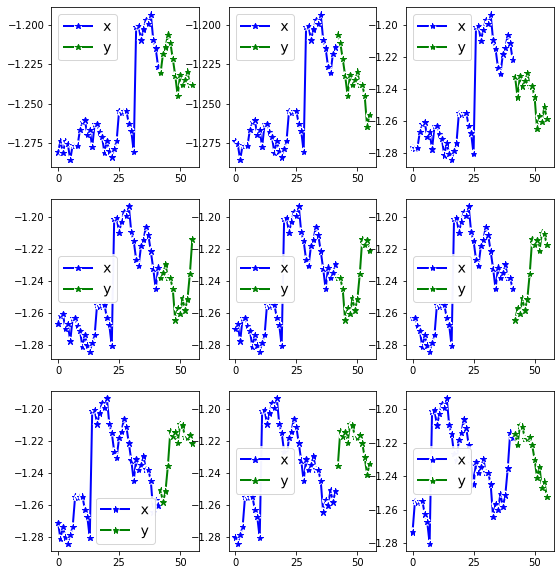

In [ ]:
# items = dummy_data_generator(50, 10, nrows=1000)
# data = TSDataBunch.from_items(items, horizon = 7)
data.show_batch()

In [ ]:
# TODO make custom learner with custom model
learn = nbeats_learner(data,layers=[512, 512], stack_types=("trend","seasonality"), b_loss=.4, nb_blocks_per_stack=5,
                       loss_func=CombinedLoss(F.mse_loss, smape, ratio = {'smape':.05})
                      )

findfont: Font family ['Cambria Math'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Cambria Math'] not found. Falling back to DejaVu Sans.


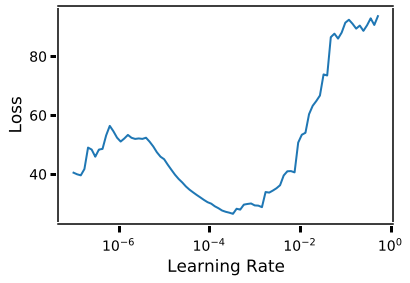

In [ ]:
from fastai2.callback.all import *
learn.lr_find()

In [ ]:
learn.fit_one_cycle(3, 1e-4, cbs=cbs)
learn.recorder.plot_loss()

epoch,train_loss,valid_loss,mae,smape,mse_loss,theta,b_loss,time


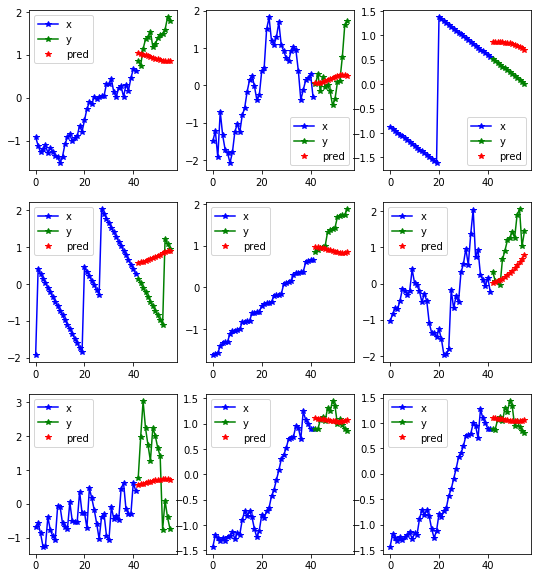

In [ ]:
learn.show_results(2,max_n=9)

## Interperation

In [ ]:
from fastai2.interpret import *
from fastseq.interpret import *

In [ ]:
interp = NBeatsInterpretation.from_learner(learn)

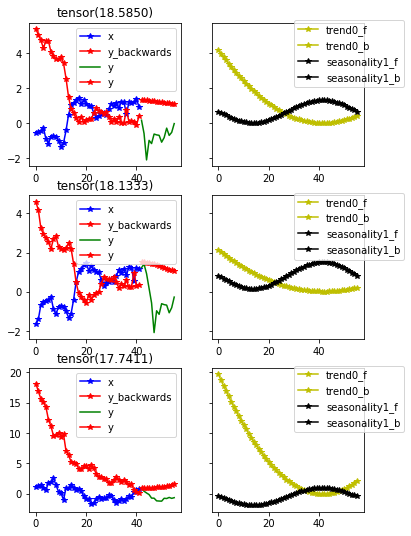

In [ ]:
interp.plot_top_losses(3)